<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/21_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

wine dataset을 Support Vector Machine으로 분류해봅시다

https://www.kaggle.com/danielpanizzo/wine-quality

이론적인 내용은 교재 3.4 ~ 3.5장 참고

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
red = pd.read_csv('/content/drive/MyDrive/ML_DL_202002/wineQualityReds.csv', index_col=0)

In [ ]:
red

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


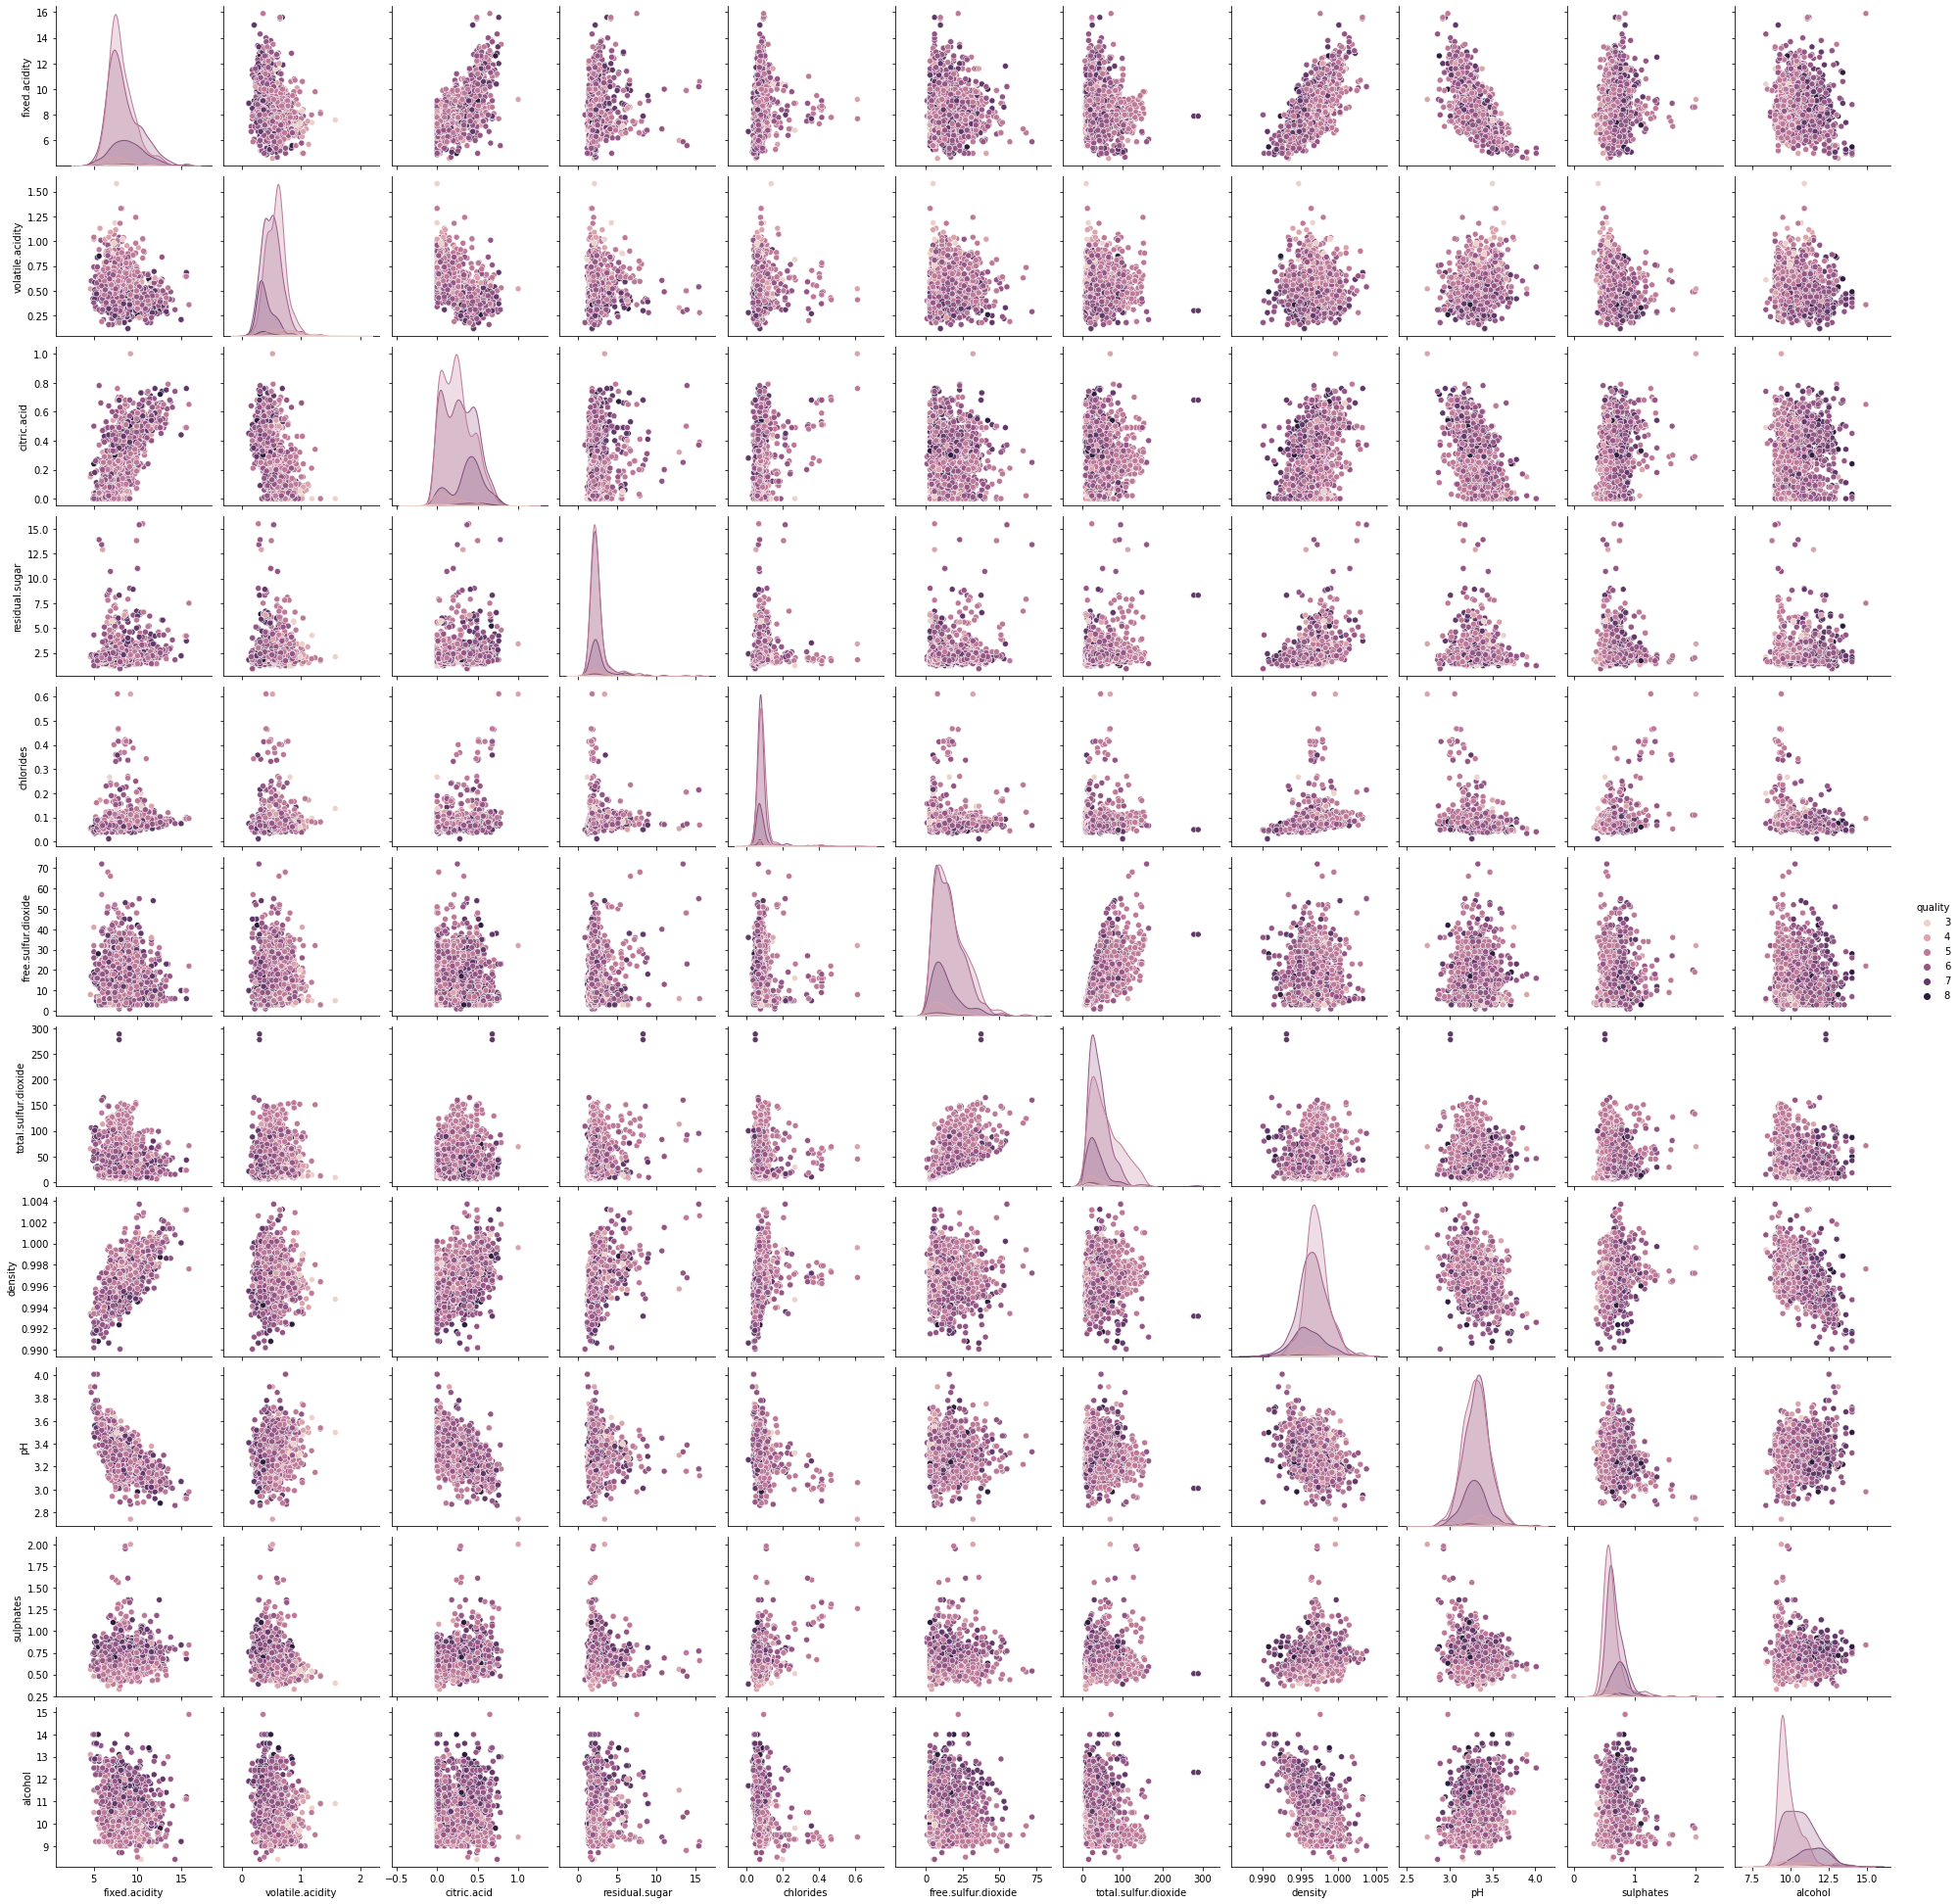

In [ ]:
sns.pairplot(red, hue='quality')

In [ ]:
red.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [ ]:
X = red.iloc[:,:-1]
y=red.quality.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
y_train

array([5, 5, 6, ..., 5, 5, 7])

In [ ]:
X_train.shape

(1119, 11)

support vector machine은 여러가지의 세부적인 알고리즘이 존재합니다

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
y_pred

array([6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.4979166666666667

데이터를 standard scaling 후에 해보자

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [ ]:
X_train2.max(axis=0)

array([ 4.25718035,  4.48851091,  3.72345451,  8.86447142, 10.46265984,
        4.84839873,  7.31967235,  3.63503037,  4.52685522,  7.83575184,
        3.39121768])

In [ ]:
svm.fit(X_train2, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm.predict(X_test2)
accuracy_score(y_test, y_pred)

0.6479166666666667

데이터를 minmax scaling 후에 해보자

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train3 = scaler.transform(X_train)
X_test3 = scaler.transform(X_test)

In [ ]:
svm.fit(X_train3, y_train)
y_pred = svm.predict(X_test3)
accuracy_score(y_test, y_pred)

0.6166666666666667